# Checking Resource

In [ ]:
!nvidia-smi

Mon May 20 05:32:10 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P0              43W / 400W |      2MiB / 40960MiB |      0%      Default |
|                                         |                      |             Disabled |
+-----------------------------------------+----------------------+--

In [ ]:
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize
import psutil
import humanize
import os
import GPUtil as GPU
GPUs = GPU.getGPUs()
# XXX: only one GPU on Colab and isn’t guaranteed
gpu = GPUs[0]
def printm():
 process = psutil.Process(os.getpid())
 print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " | Proc size: " + humanize.naturalsize( process.memory_info().rss))
 print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
printm()

Gen RAM Free: 86.4 GB  | Proc size: 1.7 GB
GPU RAM Free: 40511MB | Used: 2MB | Util   0% | Total 40960MB


# Install requirements

In [ ]:
!pip install ultralytics torch sahi onnx onnxruntime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 757.9/757.9 kB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.6/112.6 kB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 71.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 109.4 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x

# Prepare dataset

In [ ]:
!unzip wb_localization_dataset2.zip

Archive:  wb_localization_dataset2.zip
   creating: wb_localization_dataset2/
  inflating: __MACOSX/._wb_localization_dataset2  
  inflating: wb_localization_dataset2/.DS_Store  
  inflating: __MACOSX/wb_localization_dataset2/._.DS_Store  
   creating: wb_localization_dataset2/images/
  inflating: __MACOSX/wb_localization_dataset2/._images  
   creating: wb_localization_dataset2/labels/
  inflating: __MACOSX/wb_localization_dataset2/._labels  
  inflating: wb_localization_dataset2/images/.DS_Store  
  inflating: __MACOSX/wb_localization_dataset2/images/._.DS_Store  
   creating: wb_localization_dataset2/images/train/
  inflating: __MACOSX/wb_localization_dataset2/images/._train  
   creating: wb_localization_dataset2/images/val/
  inflating: __MACOSX/wb_localization_dataset2/images/._val  
  inflating: wb_localization_dataset2/labels/.DS_Store  
  inflating: __MACOSX/wb_localization_dataset2/labels/._.DS_Store  
   creating: wb_localization_dataset2/labels/train/
  inflating: __MACOSX/

# Training with YOLO

In [ ]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()

In [ ]:
from pathlib import Path

from IPython.display import Image
from sahi import AutoDetectionModel
from sahi.predict import get_prediction, get_sliced_prediction, predict
from sahi.utils.cv import read_image
from sahi.utils.file import download_from_url
from sahi.utils.yolov8 import download_yolov8s_model

In [ ]:
!yolo task=detect mode=train model=yolov8x.pt data=/content/wb_localization_dataset2/data.yaml epochs=500 imgsz=800 batch=16 device=0 verbose=True

100% 131M/131M [00:00<00:00, 290MB/s]
Ultralytics YOLOv8.2.18 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=/content/wb_localization_dataset2/data.yaml, epochs=500, time=None, patience=100, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_co

# Training result

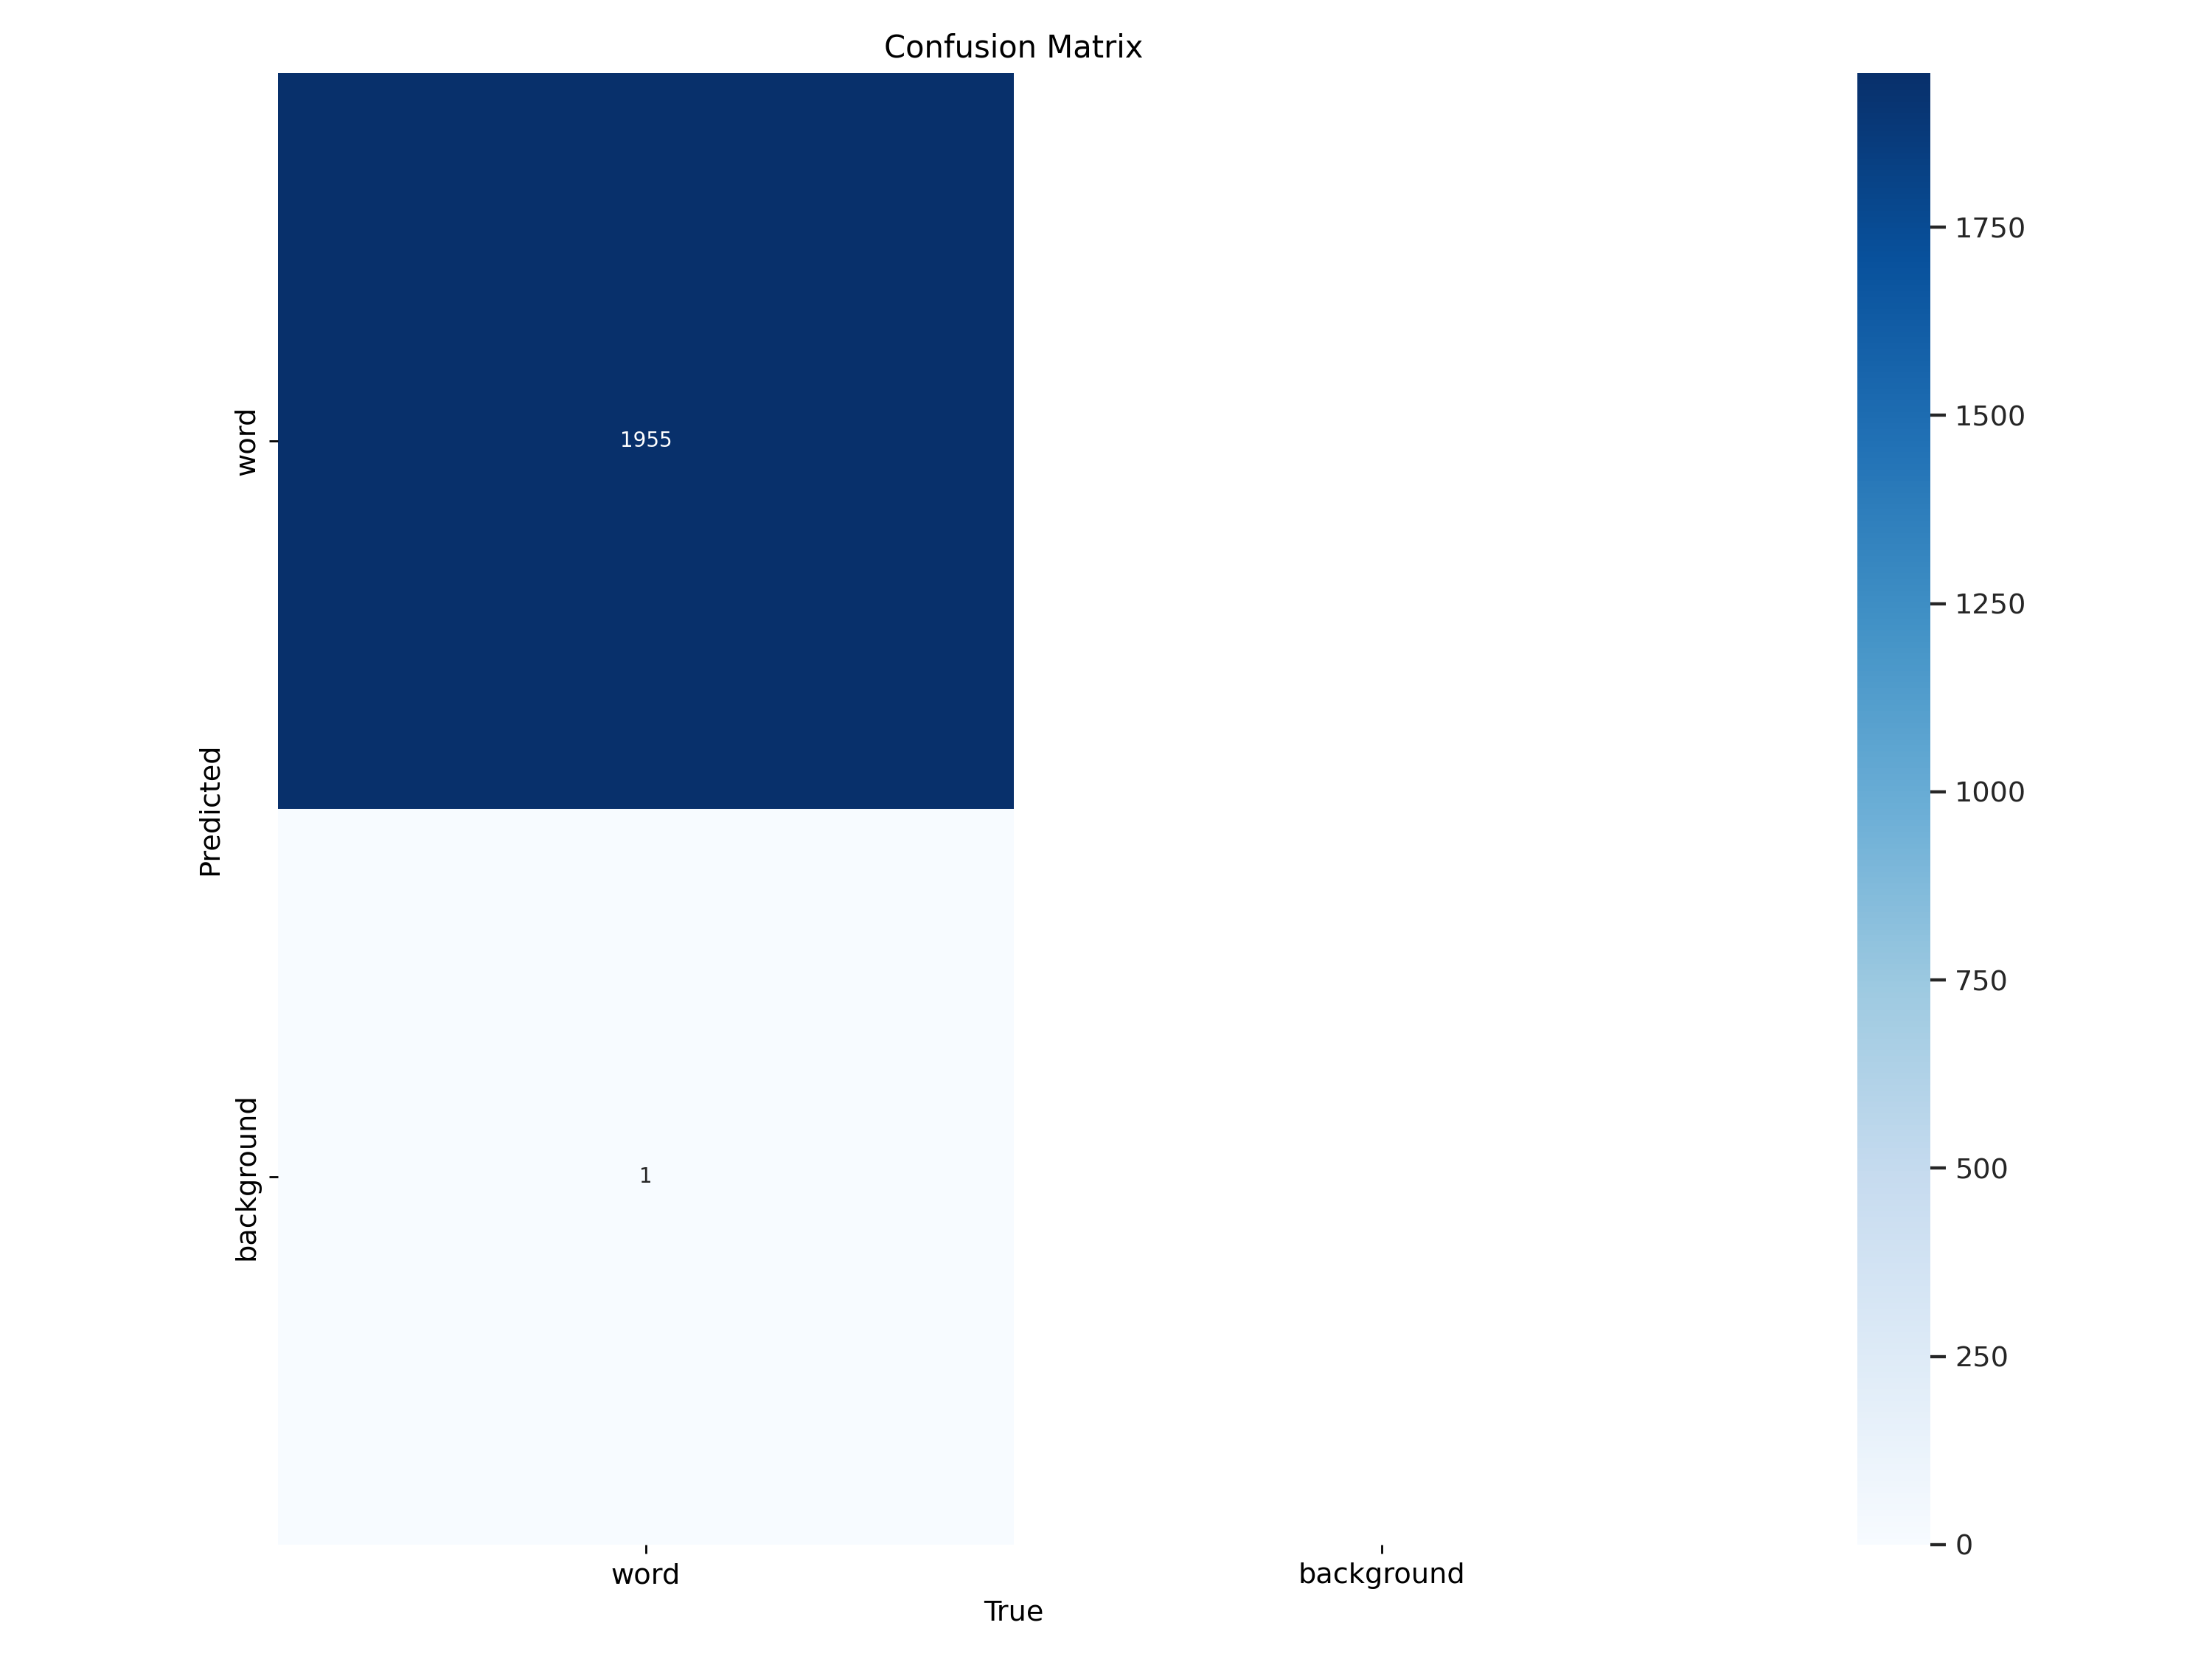

In [ ]:
Image(filename=f'/content/runs/detect/train/confusion_matrix.png', width=600)

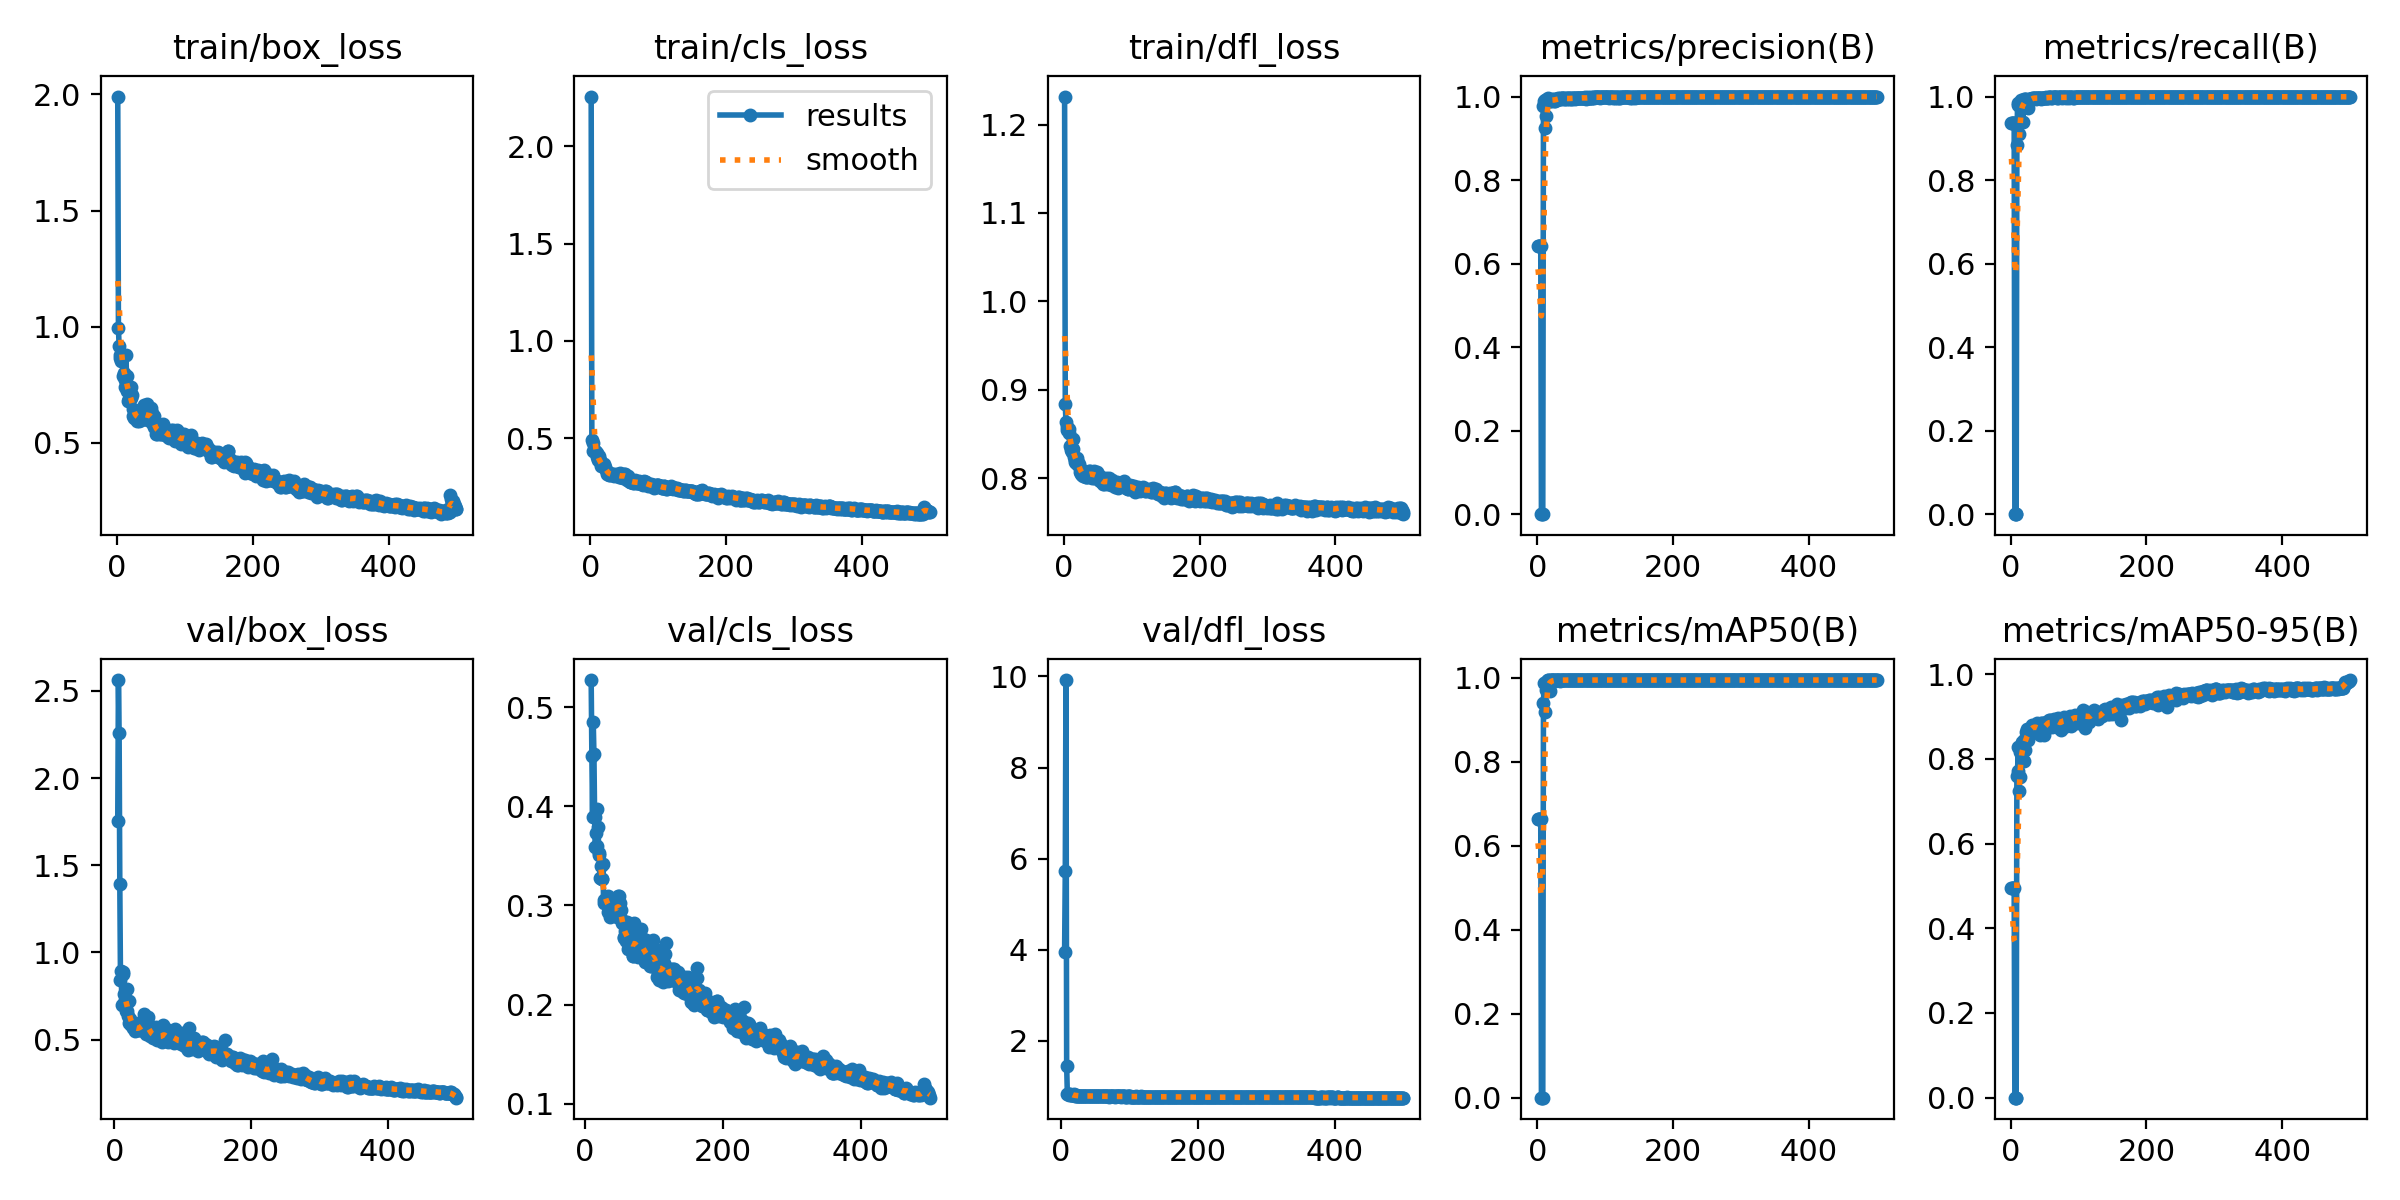

In [ ]:
Image(filename=f'/content/runs/detect/train/results.png', width=600)

# Prediction using multiple parameters (Including testing SAHI)

In [ ]:
predict(
    model_type="yolov8",
    model_path="/content/runs/detect/train10/weights/best.pt",
    model_device="cudo:0",  # or 'cuda:0'
    model_confidence_threshold=0.4,
    source="/content/wb_localization_dataset/images/val",
    slice_height=200,
    slice_width=200,
    overlap_height_ratio=0.2,
    overlap_width_ratio=0.2,
)

There are 10 listed files in folder: val/


Performing inference on images:   0%|          | 0/10 [00:00<?, ?it/s]

Performing prediction on 1 number of slices.


Performing inference on images:  10%|█         | 1/10 [00:01<00:14,  1.66s/it]

Prediction time is: 1619.11 ms
Performing prediction on 6 number of slices.


Performing inference on images:  20%|██        | 2/10 [00:07<00:30,  3.86s/it]

Prediction time is: 5346.12 ms
Performing prediction on 1 number of slices.


Performing inference on images:  30%|███       | 3/10 [00:07<00:17,  2.50s/it]

Prediction time is: 840.55 ms
Performing prediction on 6 number of slices.


Performing inference on images:  40%|████      | 4/10 [00:12<00:20,  3.43s/it]

Prediction time is: 4786.30 ms
Performing prediction on 1 number of slices.


Performing inference on images:  50%|█████     | 5/10 [00:13<00:12,  2.50s/it]

Prediction time is: 791.35 ms
Performing prediction on 6 number of slices.


Performing inference on images:  60%|██████    | 6/10 [00:19<00:14,  3.51s/it]

Prediction time is: 5411.44 ms
Performing prediction on 6 number of slices.


Performing inference on images:  70%|███████   | 7/10 [00:23<00:11,  3.88s/it]

Prediction time is: 4603.69 ms
Performing prediction on 6 number of slices.


Performing inference on images:  80%|████████  | 8/10 [00:29<00:08,  4.31s/it]

Prediction time is: 5176.39 ms
Performing prediction on 1 number of slices.


Performing inference on images:  90%|█████████ | 9/10 [00:29<00:03,  3.22s/it]

Prediction time is: 751.07 ms
Performing prediction on 6 number of slices.


Performing inference on images: 100%|██████████| 10/10 [00:34<00:00,  3.43s/it]

Prediction time is: 4446.18 ms
Prediction results are successfully exported to runs/predict/exp2


In [ ]:
!yolo task=detect mode=val model='/content/runs/detect/train/weights/best.pt' data='/content/wb_localization_dataset2/data.yaml' verbose=True

Ultralytics YOLOv8.2.18 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
Model summary (fused): 268 layers, 68124531 parameters, 0 gradients, 257.4 GFLOPs
val: Scanning /content/wb_localization_dataset2/labels/val.cache... 10 images, 0 backgrounds, 0 corrupt: 100% 10/10 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 1/1 [00:03<00:00,  3.89s/it]
                   all         10       1956          1      0.999      0.995      0.995
Speed: 0.7ms preprocess, 38.2ms inference, 0.0ms loss, 168.6ms postprocess per image
Results saved to runs/detect/v

In [ ]:
!yolo task=detect mode=val conf=0.7 iou=0.7 plots=True batch=6 imgsz=1024 model='/content/runs/detect/train16/weights/best.pt' data='/content/wb_localization_dataset/data.yaml' verbose=True

Ultralytics YOLOv8.2.18 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 268 layers, 68124531 parameters, 0 gradients, 257.4 GFLOPs
val: Scanning /content/wb_localization_dataset/labels/val.cache... 10 images, 0 backgrounds, 0 corrupt: 100% 10/10 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:26<00:00, 13.08s/it]
                   all         10       1956      0.995      0.994      0.995        0.9
Speed: 2.3ms preprocess, 1864.5ms inference, 0.0ms loss, 204.3ms postprocess per image
Results saved to runs/detect/val9
💡 Learn more at https://docs.ultralytics.com/modes/val


# Image output

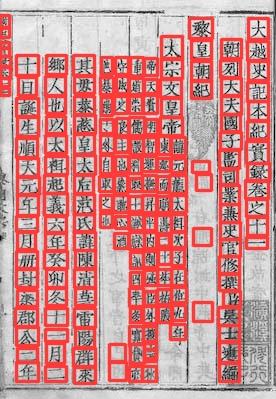

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/runs/detect/predict/*.jpg'):
  display(Image(filename=image_path, height=800))
  print('\n')